# Importing Preprocessed Data

In [50]:
import pandas as pd
from google.colab import files

uploaded = files.upload()
data = pd.read_csv('RiverWaterQualityOverYears_PreprocessedData.csv')
data.head()

Saving RiverWaterQualityOverYears_PreprocessedData.csv to RiverWaterQualityOverYears_PreprocessedData (1).csv


,Station Code,Monitoring Location,State,Temperature (°C) Min,Temperature (°C) Max,Dissolved Oxygen (mg/L) Min,Dissolved Oxygen (mg/L) Max,pH Min,pH Max,Conductivity (µmho/cm) Min,...,Nitrate N (mg/L) Min,Nitrate N (mg/L) Max,Fecal Coliform (MPN/100ml) Min,Fecal Coliform (MPN/100ml) Max,Total Coliform (MPN/100ml) Min,Total Coliform (MPN/100ml) Max,Fecal Streptococci (MPN/100ml) Min,Fecal Streptococci (MPN/100ml) Max,Year,Contaminated
0,1001,RIVER BEAS AT U/S MANALI,HIMACHAL PRADESH,18.95,24.0,7.8,9.2,7.2,8.2,68.0,...,0.32,1.15,2.0,170.0,63.0,540.0,2.0,2.0,2023,0
1,2601,RIVER BEAS AT D/S MANALI,HIMACHAL PRADESH,18.95,29.0,7.6,9.0,6.5,8.1,58.0,...,0.32,1.87,110.0,1600.0,920.0,1600.0,2.0,2.0,2023,0
2,4444,RIVER BEAS D/S OF WASTE PROCESSING FACILITY AT...,HIMACHAL PRADESH,18.95,29.0,7.8,8.8,6.7,7.8,62.0,...,0.32,1.08,110.0,1600.0,350.0,1600.0,2.0,2.0,2023,0
3,4037,RIVER BEAS D/S MANALSU NALLAH,HIMACHAL PRADESH,18.95,29.0,7.9,8.9,6.3,8.0,52.0,...,0.32,1.74,22.0,110.0,79.0,540.0,2.0,2.0,2023,0
4,3866,RIVER BEAS U/S BEFORE CONF. OF MANALSU NALLAH,HIMACHAL PRADESH,18.95,29.0,7.8,9.1,7.0,7.8,51.0,...,0.32,0.97,23.0,120.0,110.0,430.0,2.0,2.0,2023,0


In [51]:
df = pd.DataFrame(data)

# ML models

In [36]:
!nvidia-smi

Thu Jun 19 12:00:36 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   43C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [37]:
%load_ext cuml.accel

[2025-06-19 12:00:49.142] [CUML] [info] cuML: Installed accelerator for sklearn.
[2025-06-19 12:01:16.321] [CUML] [info] cuML: Installed accelerator for umap.
[2025-06-19 12:01:16.394] [CUML] [info] cuML: Installed accelerator for hdbscan.
[2025-06-19 12:01:16.394] [CUML] [info] cuML: Successfully initialized accelerator.


## Logistic regression

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

num_fields = ["Temperature (°C) Min", "Temperature (°C) Max", "Dissolved Oxygen (mg/L) Min", "Dissolved Oxygen (mg/L) Max", "pH Min", "pH Max",
              "Conductivity (µmho/cm) Min", "Conductivity (µmho/cm) Max", "BOD (mg/L) Min", "BOD (mg/L) Max", "Nitrate N (mg/L) Min", "Nitrate N (mg/L) Max",
              "Fecal Coliform (MPN/100ml) Min", "Fecal Coliform (MPN/100ml) Max","Total Coliform (MPN/100ml) Min", "Total Coliform (MPN/100ml) Max",
              "Fecal Streptococci (MPN/100ml) Min", "Fecal Streptococci (MPN/100ml) Max", "Year" ]

x = df[num_fields]
y = df['Contaminated']

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42)

log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)

y_pred_log = log_clf.predict(X_test)

print(f"confusion matrix: \n{confusion_matrix(y_pred_log, y_test)}")
print(f"clasification report:\n {classification_report(y_pred_log, y_test)}")

[2025-06-19 12:01:19.434] [CUML] [warning] L-BFGS: max iterations reached
[2025-06-19 12:01:19.435] [CUML] [warning] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
confusion matrix: 
[[1286  255]
 [ 205  756]]
clasification report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.85      1541
           1       0.75      0.79      0.77       961

    accuracy                           0.82      2502
   macro avg       0.81      0.81      0.81      2502
weighted avg       0.82      0.82      0.82      2502



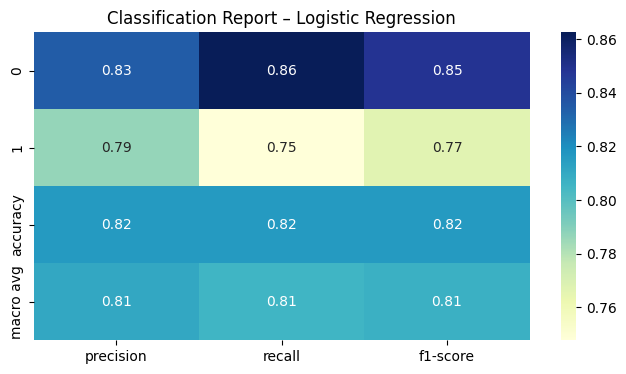

In [44]:
from sklearn.metrics import classification_report
import pandas as pd

# Generate report and convert to DataFrame
report = classification_report(y_test, y_pred_log, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Plot
plt.figure(figsize=(8, 4))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Classification Report – Logistic Regression")
plt.show()


## Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

num_fields = ["Temperature (°C) Min", "Temperature (°C) Max", "Dissolved Oxygen (mg/L) Min", "Dissolved Oxygen (mg/L) Max", "pH Min", "pH Max",
              "Conductivity (µmho/cm) Min", "Conductivity (µmho/cm) Max", "BOD (mg/L) Min", "BOD (mg/L) Max", "Nitrate N (mg/L) Min", "Nitrate N (mg/L) Max",
              "Fecal Coliform (MPN/100ml) Min", "Fecal Coliform (MPN/100ml) Max","Total Coliform (MPN/100ml) Min", "Total Coliform (MPN/100ml) Max",
              "Fecal Streptococci (MPN/100ml) Min", "Fecal Streptococci (MPN/100ml) Max", "Year" ]

x = df[num_fields]
y = df['Contaminated']

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42)

dec_clf = DecisionTreeClassifier()
dec_clf.fit(X_train, y_train)

y_pred_dec = log_clf.predict(X_test)

print(f"confusion matrix: \n{confusion_matrix(y_pred_dec, y_test)}")
print(f"clasification report:\n {classification_report(y_pred_dec, y_test)}")

confusion matrix: 
[[1286  255]
 [ 205  756]]
clasification report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.85      1541
           1       0.75      0.79      0.77       961

    accuracy                           0.82      2502
   macro avg       0.81      0.81      0.81      2502
weighted avg       0.82      0.82      0.82      2502



## Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

num_fields = ["Temperature (°C) Min", "Temperature (°C) Max", "Dissolved Oxygen (mg/L) Min", "Dissolved Oxygen (mg/L) Max", "pH Min", "pH Max",
              "Conductivity (µmho/cm) Min", "Conductivity (µmho/cm) Max", "BOD (mg/L) Min", "BOD (mg/L) Max", "Nitrate N (mg/L) Min", "Nitrate N (mg/L) Max",
              "Fecal Coliform (MPN/100ml) Min", "Fecal Coliform (MPN/100ml) Max","Total Coliform (MPN/100ml) Min", "Total Coliform (MPN/100ml) Max",
              "Fecal Streptococci (MPN/100ml) Min", "Fecal Streptococci (MPN/100ml) Max", "Year" ]

x = df[num_fields]
y = df['Contaminated']

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42)

rad_clf = RandomForestClassifier()
rad_clf.fit(X_train, y_train)

y_pred_rand = log_clf.predict(X_test)

print(f"confusion matrix: \n{confusion_matrix(y_pred_rand, y_test)}")
print(f"clasification report:\n {classification_report(y_pred_rand, y_test)}")

confusion matrix: 
[[1286  255]
 [ 205  756]]
clasification report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.85      1541
           1       0.75      0.79      0.77       961

    accuracy                           0.82      2502
   macro avg       0.81      0.81      0.81      2502
weighted avg       0.82      0.82      0.82      2502



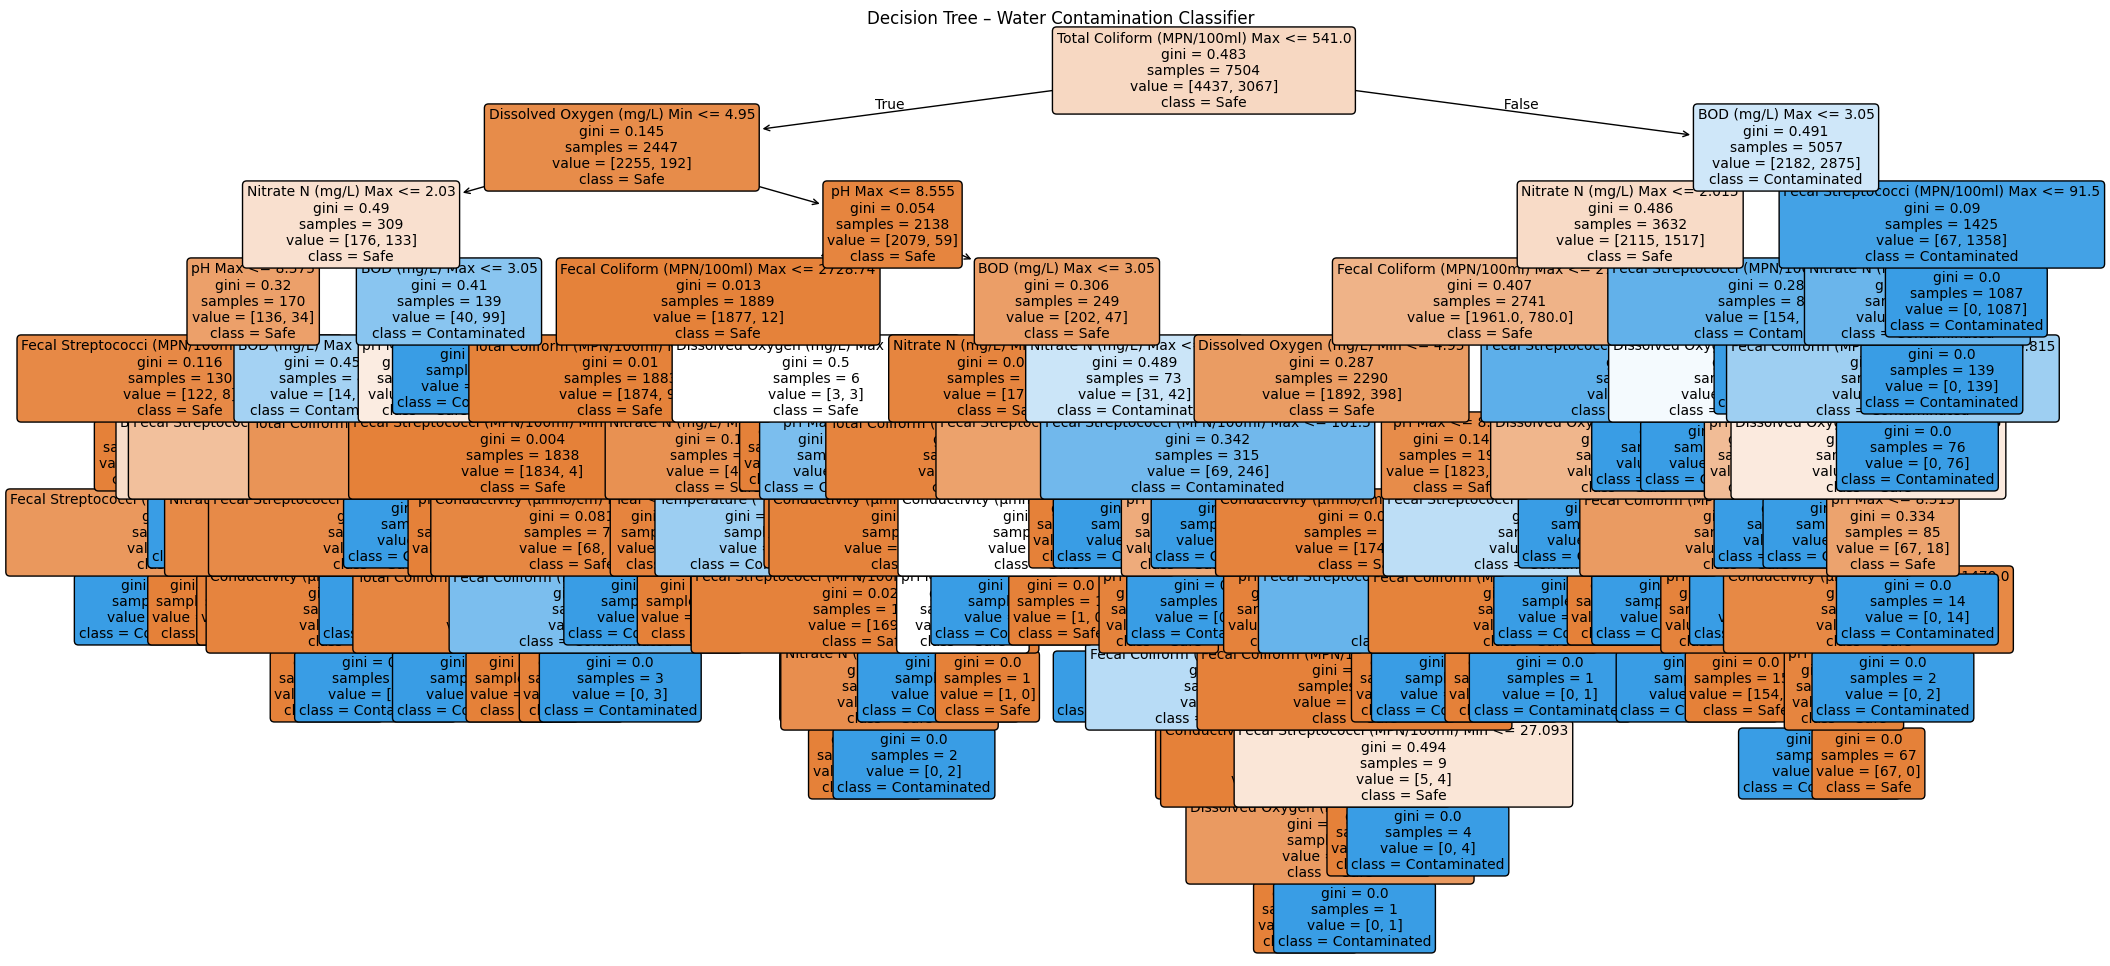

In [45]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 12))  # Increase size for better readability
plot_tree(dec_clf,
          feature_names=num_fields,
          class_names=["Safe", "Contaminated"],
          filled=True,
          rounded=True,
          fontsize=10)

plt.title("Decision Tree – Water Contamination Classifier")
plt.show()


## Using AdaBoost

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

reg2 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators = 100, random_state=42)

reg2.fit(X_train, y_train)
y_pred_adaboost = reg2.predict(X_test)


print(confusion_matrix(y_test, y_pred_adaboost))
print(classification_report(y_test, y_pred_adaboost))

[[1490    1]
 [   7 1004]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1491
           1       1.00      0.99      1.00      1011

    accuracy                           1.00      2502
   macro avg       1.00      1.00      1.00      2502
weighted avg       1.00      1.00      1.00      2502



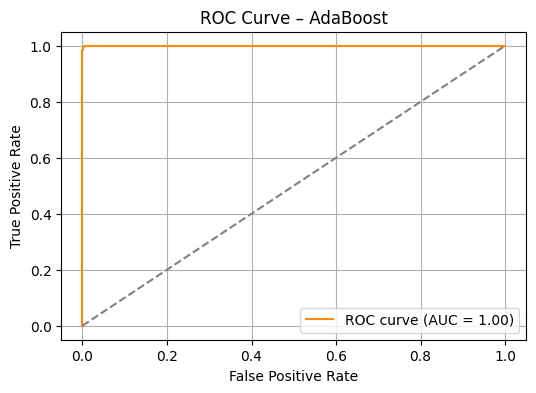

In [47]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for class 1
y_proba = reg2.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})", color="darkorange")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – AdaBoost")
plt.legend()
plt.grid(True)
plt.show()


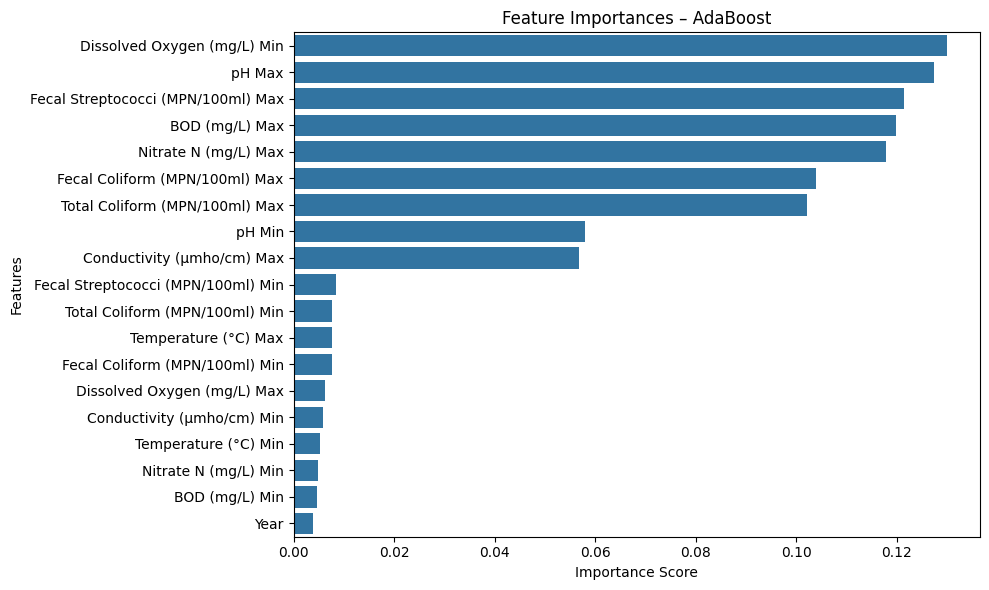

In [46]:
import numpy as np

importances = reg2.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=[num_fields[i] for i in indices])
plt.title("Feature Importances – AdaBoost")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


## Using XGBoost

In [42]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report


model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=len(y[y==0]) / len(y[y==1]))

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:01:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[[1489    2]
 [  13  998]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1491
           1       1.00      0.99      0.99      1011

    accuracy                           0.99      2502
   macro avg       0.99      0.99      0.99      2502
weighted avg       0.99      0.99      0.99      2502



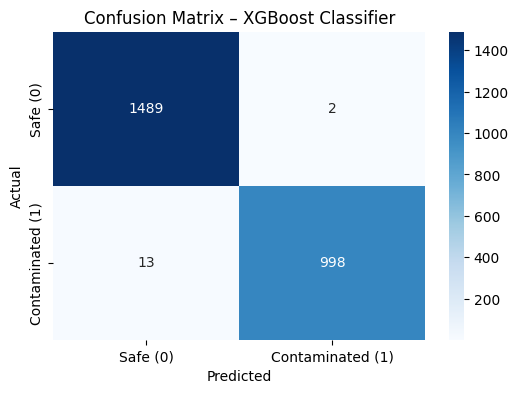

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Safe (0)", "Contaminated (1)"],
            yticklabels=["Safe (0)", "Contaminated (1)"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – XGBoost Classifier")
plt.show()


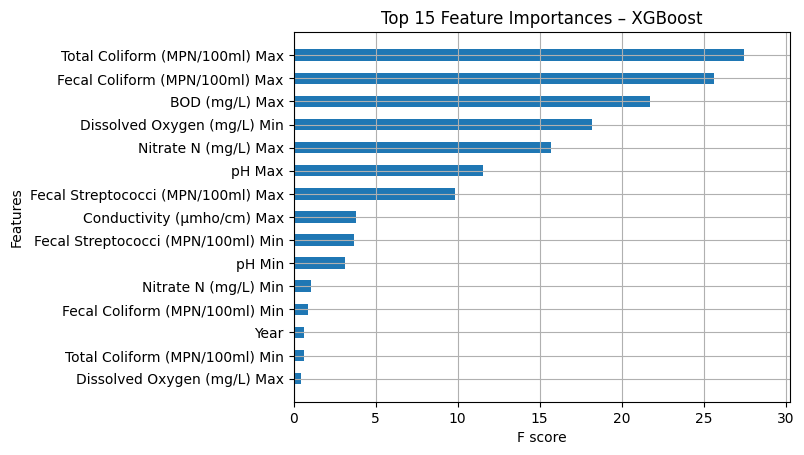

In [49]:
xgb.plot_importance(model, height=0.5, max_num_features=15, importance_type='gain', show_values=False)
plt.title("Top 15 Feature Importances – XGBoost")
plt.show()
